# Description
In this notebook we show how to use pyMatchSeries in combination with Hyperspy to perform non-rigid-registration on image data as well as on spectroscopic data

In [3]:
import hyperspy.api as hs
import os

## 1. Import the data, download if not already on system

In [10]:
file_path = "./data/sample_data.emd"

if not os.path.isfile(file_path):
    import wget
    print("File not found on system, downloading... please be patient")
    url = "https://owncloud.gwdg.de/index.php/s/hb7QFFl2EswRpZA/download"
    folder, filename = os.path.split(file_path)
    if not os.path.isdir(folder):
        os.makedirs(folder)
    wget.download(url, file_path)

In [28]:
data = hs.load(file_path, lazy=True, load_SI_image_stack=True)

## 2. Inspect the data

In [14]:
data

[<LazyEDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <LazySignal2D, title: Hf, dimensions: (|512, 512)>,
 <LazySignal2D, title: DF4, dimensions: (163|512, 512)>,
 <LazySignal2D, title: Ta, dimensions: (|512, 512)>,
 <LazySignal2D, title: Zr, dimensions: (|512, 512)>,
 <LazySignal2D, title: HAADF, dimensions: (163|512, 512)>,
 <LazySignal2D, title: Ti, dimensions: (|512, 512)>,
 <LazyEDSTEMSpectrum, title: EDS, dimensions: (512, 512|4096)>]

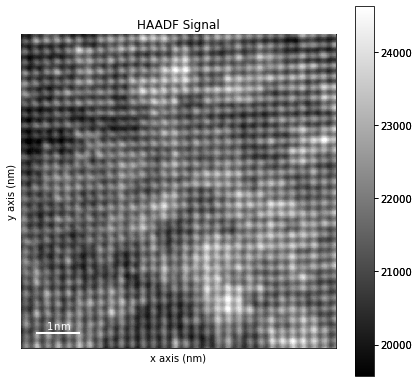

In [15]:
averaged_haadf = data[5].mean()
averaged_haadf.plot()

In [29]:
data[7].compute()
specmap = data[7].T

[########################################] | 100% Completed |  6.2s


In [32]:
from skimage.filters import gaussian

specmap = specmap.rebin(scale=(8, 4, 4))
gmap = lambda x: gaussian(x, sigma=2, preserve_range=True, truncate=8)
specmap.map(gmap, inplace=True, parallel=True)
specmap = specmap.T

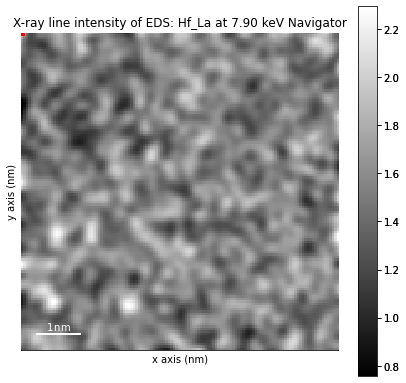

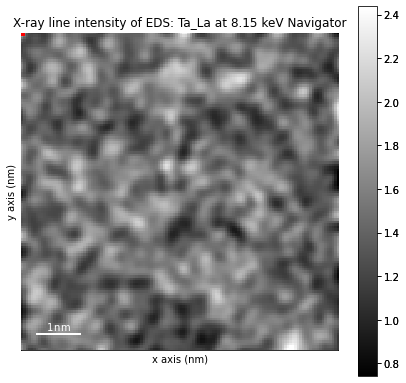

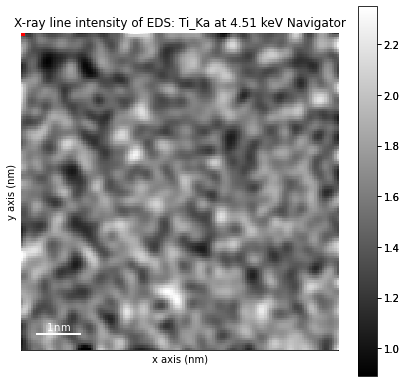

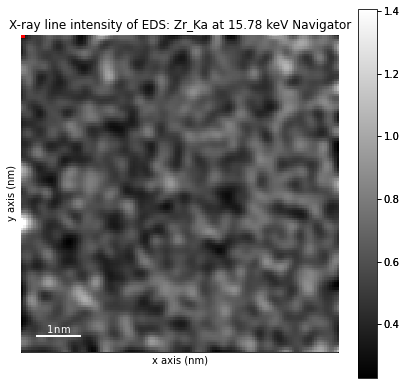

In [39]:
specmap = specmap.get_lines_intensity(plot_result=True)

For the non-rigid registration, we can remove some of the noise by gaussian smoothing of the images. We can provide a function that will do the smoothing.

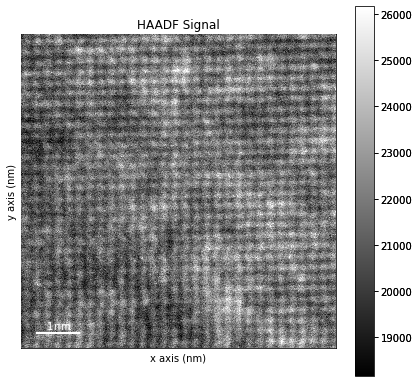

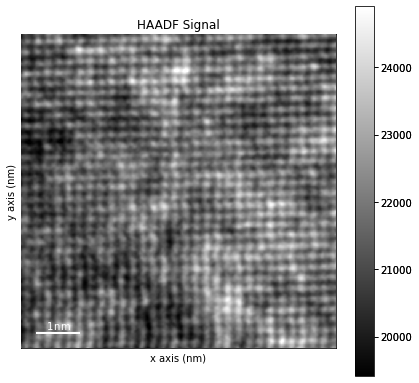

In [46]:
def smoothing(x):
    return gaussian(x, sigma=2, preserve_range=True, truncate=8)

# without smoothing
data[5].inav[0].plot()

# with smoothing
data[5].inav[0].map(smoothing, ragged=False, inplace=False).plot()

Figure out the starting binning level. Bin the images by factors of 2 until no more atomic columns can be seen.

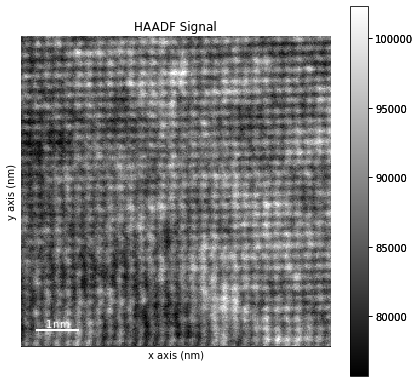

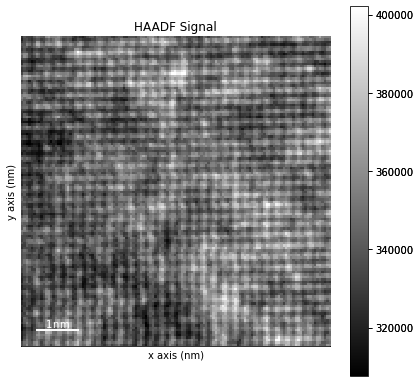

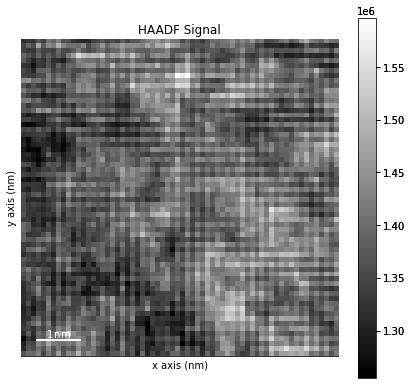

In [51]:
data[5].inav[0].rebin(scale=(2, 2)).plot() # startLevel = stoplevel -1
data[5].inav[0].rebin(scale=(4, 4)).plot() # startLevel = stoplevel -2
data[5].inav[0].rebin(scale=(8, 8)).plot() # startLevel = stoplevel -3

Startlevel 2 below the stop level should be good

## 3. Set up non-rigid registration calculation

In [40]:
from pymatchseries import MatchSeries

In [47]:
calculation = MatchSeries.new(file_path, image_filter = smoothing)

Created config file in /Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/data/sample_data/2_DF4.par
Created config file in /Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/data/sample_data/5_HAADF.par
A new calculation was created with name sample_data.hdf5


In [49]:
calculation.summary()

TypeError: get_deformations() missing 1 required positional argument: 'frame_index'